<center> 
    
# Lab Exercises: Data Visualization
</center>

In [4]:
# import important libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Fetching Data from IBM Cloud Storage

In [6]:
# URL of the CSV file from IBM cloud storage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv"

# Load into a DataFrame
ratings_df = pd.read_csv(url)
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


## Lab Exercises


#### Identify all duplicate cases using prof. Using all observations, find the average and standard deviation for age. Repeat the analysis by first filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.


In [9]:
ratings_df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69], dtype=int64)

In [10]:
ratings_df.prof.nunique()

94

Using all observations, Find the average and standard deviation for age


In [12]:
ratings_df['age'].mean()

48.365010799136066

In [13]:
ratings_df['age'].std()

9.802742037864821

Repeat the analysis by first filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.

In [15]:
no_duplicates_ratings_df = ratings_df.drop_duplicates(subset =['prof'])
no_duplicates_ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


In [16]:
no_duplicates_ratings_df['age'].mean()

47.5531914893617

In [17]:
no_duplicates_ratings_df['age'].std()

10.25651329515495

### Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.


In [19]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


Find the average teaching evaluation in both groups of upper and lower-division


In [21]:
division_eval = ratings_df.groupby('division')[['eval']].mean().reset_index()

division_eval

,division,eval
0,lower,4.087261
1,upper,3.952614


Plot the barplot using the seaborn library


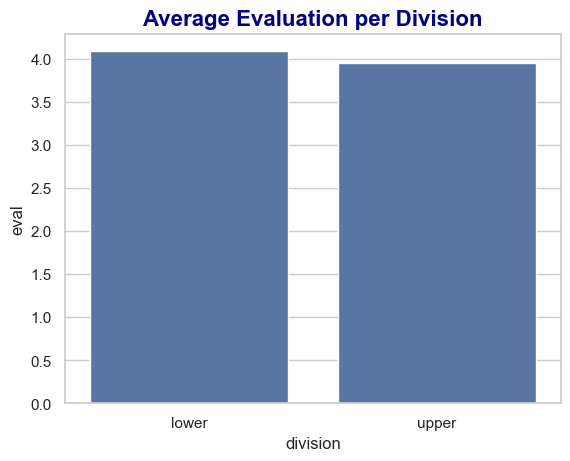

In [23]:
# using seaborn library
sns.set(style="whitegrid")
ax = sns.barplot(x="division", y="eval", data=division_eval)
plt.title("Average Evaluation per Division", fontsize=16, fontweight="bold", color="darkblue")

plt.show()

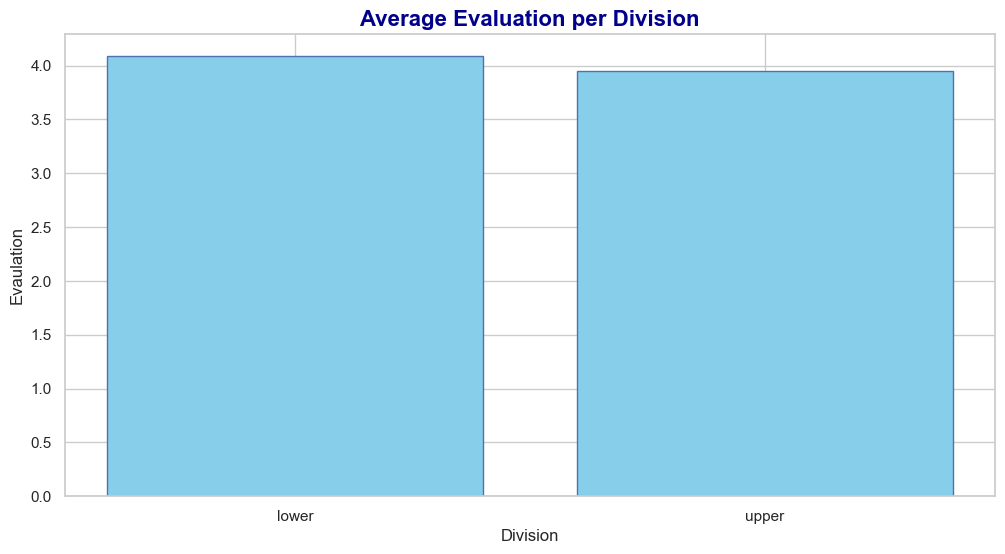

In [24]:
#using matplotlib library
# create the figure and the axis
plt.figure(figsize=(12,6))

#plot the bar chart 
plt.bar(division_eval['division'], division_eval['eval'], color='skyblue', edgecolor='b')

# Add labels and title
plt.xlabel('Division')
plt.ylabel('Evaulation')
plt.title("Average Evaluation per Division", fontsize=16, fontweight="bold", color="darkblue")


plt.show()

### Plot the relationship between age and teaching evaluation scores.

Create a scatterplot with the scatterplot function in the seaborn library



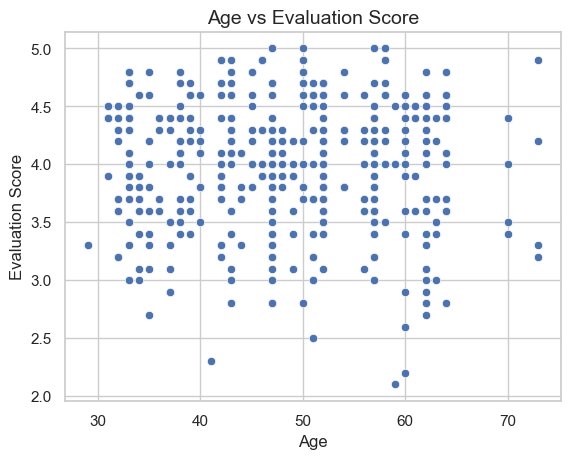

In [26]:
ax = sns.scatterplot(x='age', y='eval', data=ratings_df)
ax.set_title("Age vs Evaluation Score", fontsize=14)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Evaluation Score", fontsize=12)
plt.show()

### Example: Plotting Multiple Subplots with Seaborn & Matplotlib

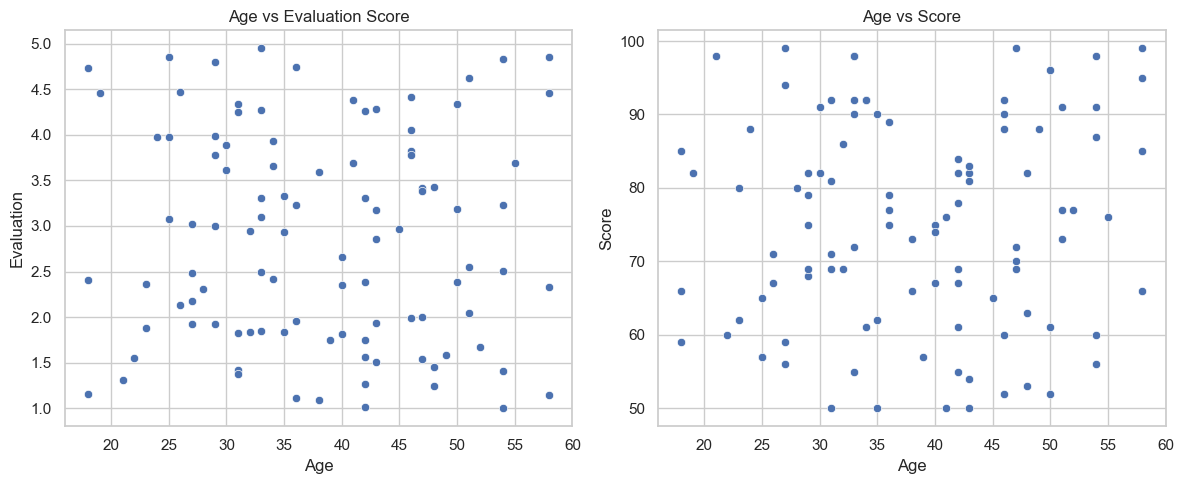

In [28]:
# sample of 
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset (Replace with your own DataFrame)
import pandas as pd
import numpy as np

np.random.seed(10)
rat_df = pd.DataFrame({
    'age': np.random.randint(18, 60, 100),
    'eval': np.random.uniform(1, 5, 100),
    'score': np.random.randint(50, 100, 100)
})

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First scatter plot: Age vs Eval
sns.scatterplot(x='age', y='eval', data=rat_df, ax=axes[0])
axes[0].set_title("Age vs Evaluation Score")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Evaluation")

# Second scatter plot: Age vs Score
sns.scatterplot(x='age', y='score', data=rat_df, ax=axes[1])
axes[1].set_title("Age vs Score")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Score")

# Adjust layout
plt.tight_layout()
plt.show()


### Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.

Create a scatterplot with the scatterplot function in the seaborn library this time add the <code>hue</code> argument



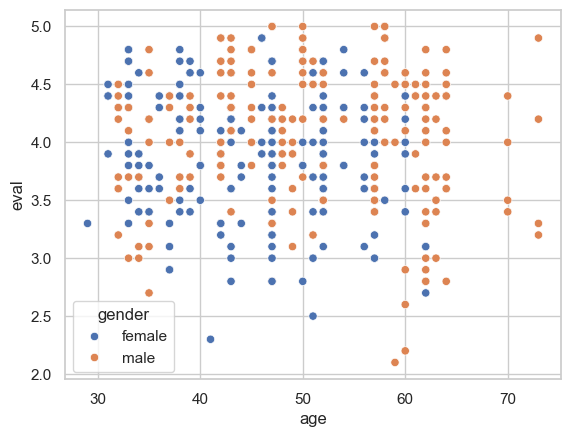

In [30]:
ax = sns.scatterplot(x='age', y='eval', hue='gender', data=ratings_df)
plt.show()

### Create a box plot for beauty scores differentiated by credits.

We use the <code>boxplot()</code> function from the seaborn library


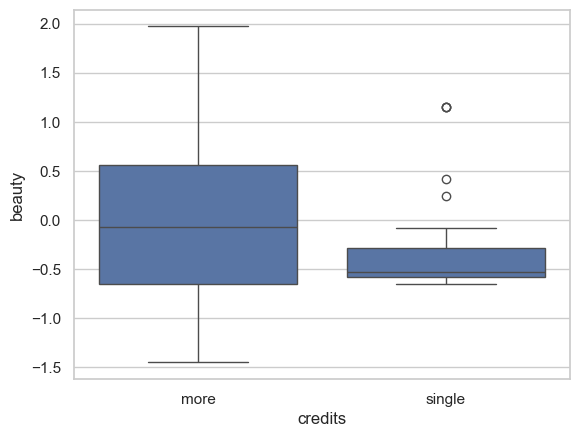

In [32]:
ax = sns.boxplot(x='credits', y='beauty', data=ratings_df)
plt.show()

### What is the number of courses taught by gender?
We use the <code>catplot()</code> function from the seaborn library


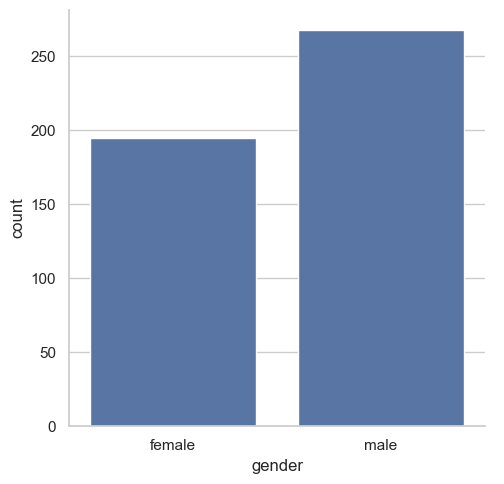

In [34]:
ax = sns.catplot(x='gender', kind='count', data=ratings_df)
plt.show()

### Create a group histogram of taught by gender and tenure

We will add the <code>hue = Tenure</code> argument



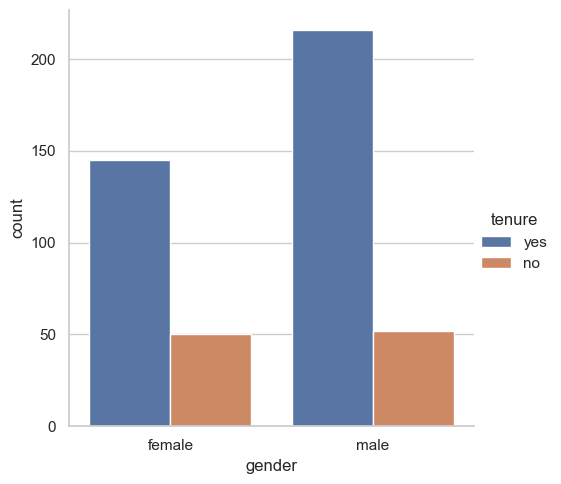

In [36]:
sns.catplot(x='gender', hue='tenure', kind='count', data=ratings_df)
plt.show()

### Add division as another factor to the above histogram

We add another argument named <code>row</code> and use the division variable as the row


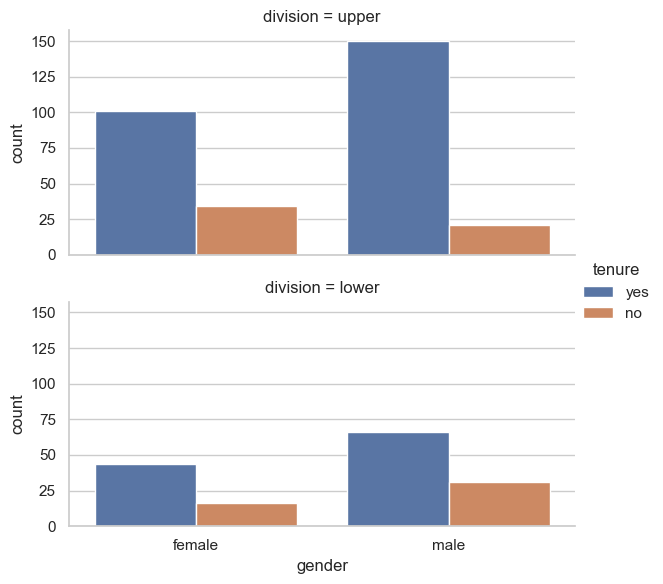

In [38]:
sns.catplot(x='gender', hue='tenure', row='division', kind='count', data=ratings_df, height = 3, aspect = 2)
plt.show()

### Create a scatterplot of age and evaluation scores, differentiated by gender and tenure

Use the <code>relplot()</code> function for complex scatter plots


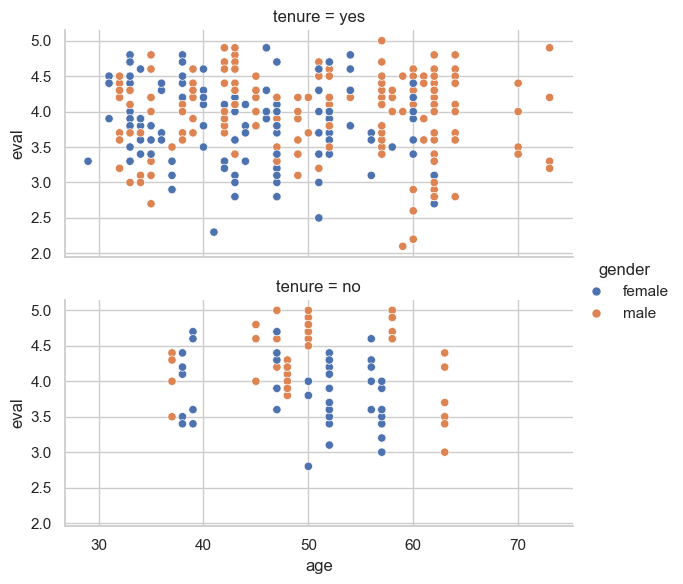

In [40]:
sns.relplot(x='age', y='eval', hue='gender', row='tenure', data=ratings_df, height=3, aspect=2)
plt.show()

### Create a distribution plot of teaching evaluation scores
We use the <code>displot()</code> function from the seaborn library, set <code>kde = false</code> because we don'e need the curve

kde stands for Kernel Density Estimate.

It controls whether a smoothed density curve (similar to a probability distribution) is drawn over the histogram.

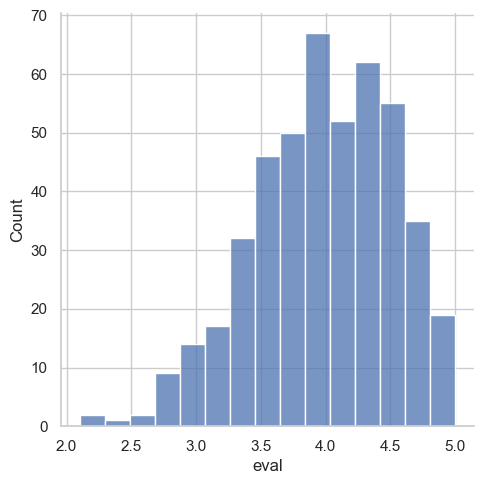

In [42]:
sns.displot(ratings_df['eval'], kde = False)
plt.show()

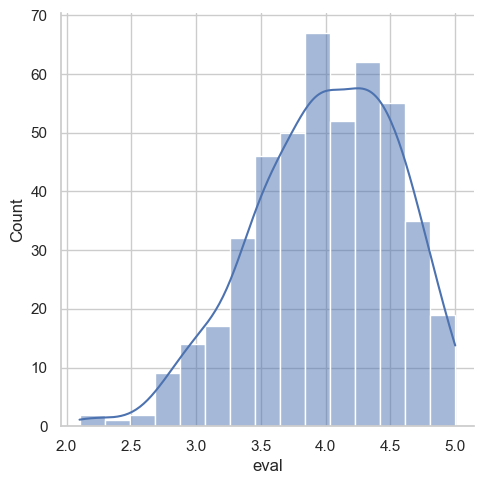

In [43]:
sns.displot(ratings_df['eval'], kde=True)
plt.show()


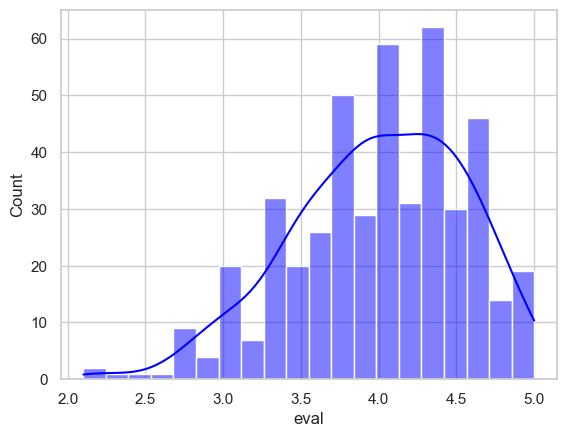

In [44]:
sns.histplot(ratings_df['eval'], bins=20, kde=True, color='blue')
plt.show()

### Example: Combining histplot() with Other Plots in Subplots

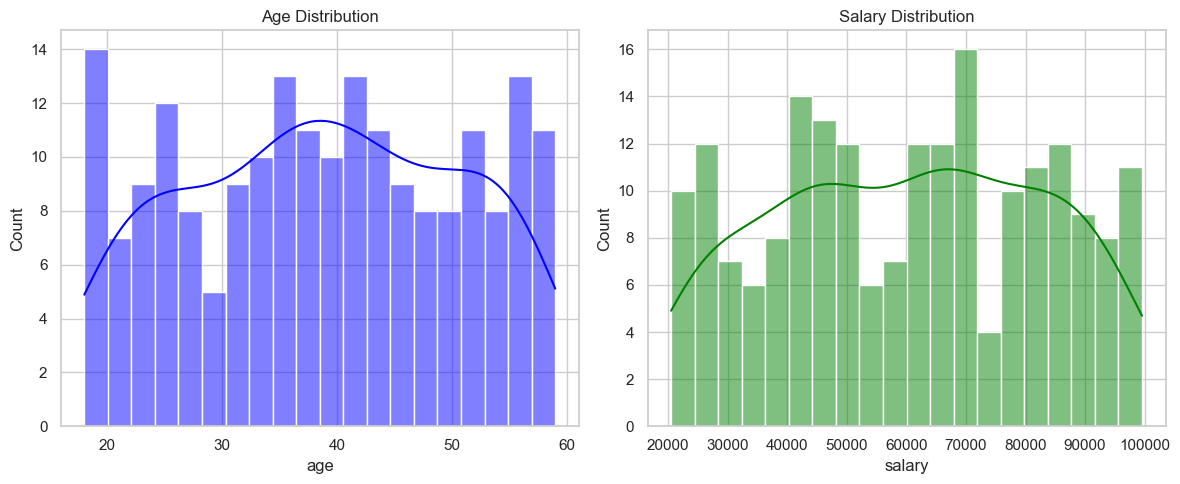

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'age': np.random.randint(18, 60, 200),
    'salary': np.random.randint(20000, 100000, 200)
})

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Age
sns.histplot(df['age'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Age Distribution")

# Histogram for Salary
sns.histplot(df['salary'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title("Salary Distribution")

# Show the plot
plt.tight_layout()
plt.show()


### Create a distribution plot of teaching evaluation score with gender as a factor


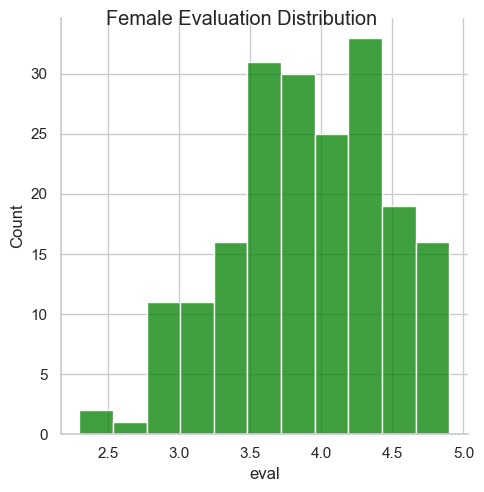

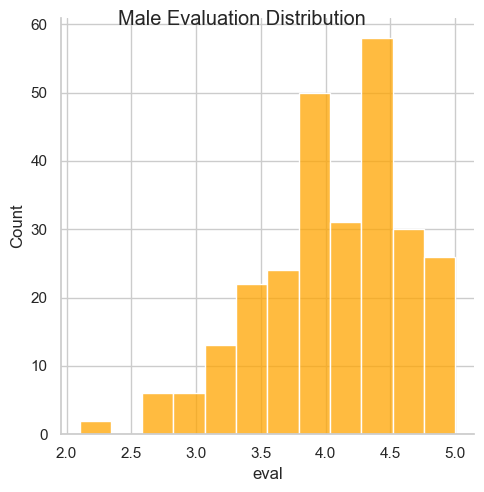

In [48]:
# Female Evaluation Distribution
g1 = sns.displot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=False)
g1.fig.suptitle("Female Evaluation Distribution")  # Title for the first graph

# Male Evaluation Distribution
g2 = sns.displot(ratings_df[ratings_df['gender'] == 'male']['eval'], color="orange", kde=False)
g2.fig.suptitle("Male Evaluation Distribution")  # Title for the second graph

plt.show()


### Create a box plot - age of the instructor by gender



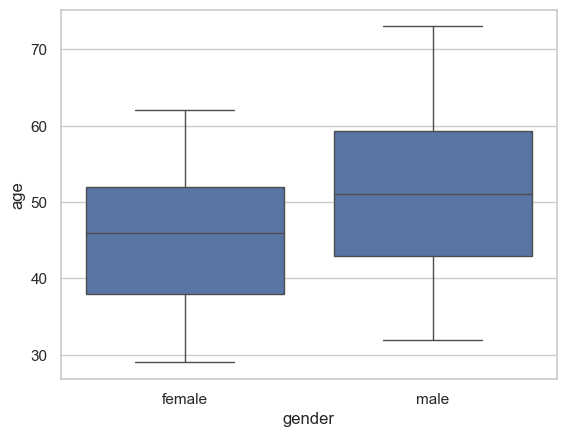

In [51]:
sns.boxplot(x='gender', y='age', data=ratings_df)
plt.show()

### Compare age along with tenure and gender


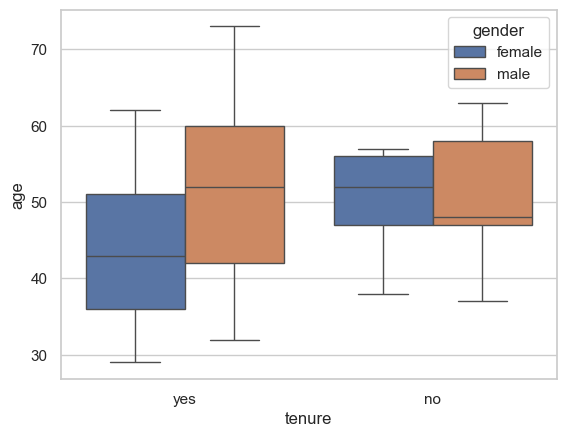

In [53]:
sns.boxplot(x='tenure', y='age', hue='gender', data=ratings_df)
plt.show()

## Practice Questions


### Question 1: Create a distribution plot of beauty scores with Native English speaker as a factor

*   Make the color of the native English speakers plot - orange and non - native English speakers - blue


In [56]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


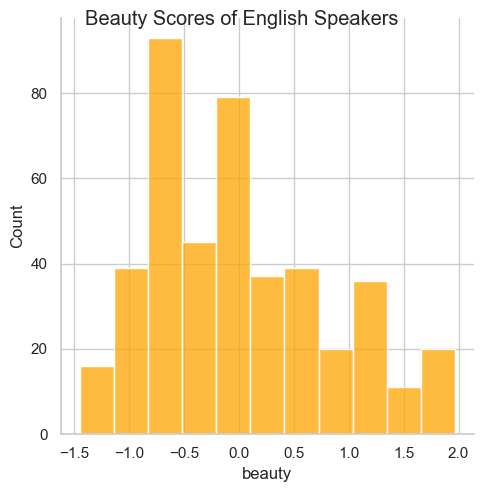

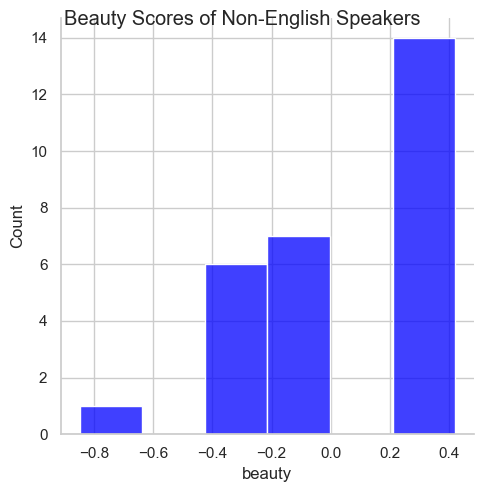

In [57]:
g1 = sns.displot(ratings_df[ratings_df['native'] == 'yes']['beauty'], color='orange', kde = False)
g1.fig.suptitle('Beauty Scores of English Speakers')

g2 = sns.displot(ratings_df[ratings_df['native'] == 'no']['beauty'], color='blue', kde = False)
g2.fig.suptitle('Beauty Scores of Non-English Speakers')

plt.show()

### Question 2: Create a Horizontal box plot of the age of the instructors by visible minority


In [59]:
sns.boxplot(y='ï»¿minority', x='ï»¿minority',  data=ratings_df)
plt.show()

ValueError: Could not interpret value `ï»¿minority` for `x`. An entry with this name does not appear in `data`.

### Question 3: Create a grouped bar plot of tenure by minority and add the gender factor


In [ ]:
sns.catplot(x='tenure', kind='count', hue='ï»¿minority', row='gender', data=ratings_df, height=3, aspect=2)
plt.show()

### Question 4: Create a boxplot of the age variable



In [ ]:
sns.boxplot(y='age', data=ratings_df)
plt.show()
